In [747]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from pylab import rcParams
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

# data

In [748]:
data_owid = pd.read_csv("./dataset/owid-energy-data.csv")

In [749]:
data_owid

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.87,1.550,NaN,569.557,NaN,NaN,NaN,NaN,NaN,76.03,NaN,NaN,NaN,NaN,20.081,NaN,378.61,NaN,378.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.36,NaN,NaN,80.653,NaN,NaN,NaN,NaN,NaN,164.26,NaN,NaN,NaN,NaN,NaN,43.385,NaN,215.64,NaN,NaN,NaN,NaN,50.45,NaN,13.325,NaN,NaN,NaN,NaN,NaN,73.25,NaN,19.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65.07,NaN,NaN,NaN,NaN,NaN,17.187,NaN,NaN,22.80,16.93,NaN,NaN,NaN,NaN,NaN,6.022,4.472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.25,NaN,19.347,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.46,1.596,NaN,567.642,NaN,NaN,NaN,NaN,NaN,86.26,NaN,NaN,NaN,NaN,21.307,NaN,404.85,NaN,404.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.66,NaN,NaN,80.934,NaN,NaN,NaN,NaN,NaN,190.41,NaN,NaN,NaN,NaN,NaN,47.032,NaN,229.81,NaN,NaN,NaN,NaN,54.33,NaN,13.420,NaN,NaN,NaN,NaN,NaN,77.19,NaN,19.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,50.99,NaN,NaN,NaN,NaN,NaN,12.595,NaN,NaN,22.86,16.40,NaN,NaN,NaN,NaN,NaN,5.647,4.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.19,NaN,19.066,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN

In [750]:
data_owid_italy = data_owid[data_owid['country'] == 'Italy'].copy()

In [751]:
data_owid_italy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
9949,Italy,1900,ITA,33332371.0,1.099054e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.112,1.170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.698,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9950,Italy,1901,ITA,33571430.0,1.123700e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.250,-0.132,30.940,1.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.693,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9951,Italy,1902,ITA,33827207.0,1.151736e+11,NaN,NaN,NaN,Na

In [752]:
data_owid_italy['year'] = pd.to_datetime(data_owid_italy['year'],format='%Y')

In [753]:
cols = [col for col in data_owid_italy.columns if 'consumption' in col and col != 'primary_energy_consumption']

data_owid_consumption = pd.concat(
    [data_owid_italy[['year','primary_energy_consumption']],
     data_owid_italy[cols]],axis=1).set_index('year').dropna()

In [754]:
exclude_cols = ['electricity_demand','electricity_generation','per_capita_electricity','electricity_demand_per_capita',
                'electricity_share_energy','net_elec_imports','net_elec_imports_share_demand'
]

cols = [col for col in data_owid_italy.columns if 'electricity' in col and col not in exclude_cols]

data_owid_electricity = pd.concat(
    [data_owid_italy[['year'] + exclude_cols],data_owid_italy[cols]],axis=1).set_index('year').dropna()

In [755]:
data_owid_share_elec = pd.concat(
     [data_owid_italy[['year','electricity_demand','electricity_generation']],
     data_owid_italy.filter(like='share_elec',axis=1)],axis=1).set_index('year').dropna()

In [756]:
data_owid_share_energy = pd.concat(
    [data_owid_italy[['year','primary_energy_consumption']],
     data_owid_italy.filter(like='share_energy',axis=1)],axis=1).set_index('year').dropna()

In [757]:
data_owid_consumption # primary energy consumption from xxx measured in terawatt-hours

,primary_energy_consumption,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,renewables_consumption,solar_consumption,wind_consumption
year,,,,,,,,,,,,,
2004-01-01,2197.520,2.754,193.013,2038.851,773.418,122.003,158.669,0.0,1072.420,28.506,158.669,0.084,5.322
2005-01-01,2200.250,1.933,191.534,2058.696,827.695,103.275,141.554,0.0,1039.467,29.549,141.554,0.089,6.709
2006-01-01,2190.067,2.178,193.911,2042.676,810.588,105.263,147.391,0.0,1038.177,31.397,147.391,0.100,8.454
2007-01-01,2148.299,1.977,189.848,2010.122,814.561,92.788,138.178,0.0,1005.712,31.895,138.178,0.110,11.407
2008-01-01,2111.905,7.983,183.701,1938.828,808.515,116.963,173.077,0.0,946.612,33.929,173.077,0.542,13.660
2009-01-01,1971.705,12.885,143.823,1762.991,743.176,137.228,208.715,0.0,875.992,38.438,208.715,1.891,18.273
2010-01-01,2036.733,15.864,159.028,1803.918,791.499,141.879,232.815,0.0,853.391,44.453,232.815,5.289,25.330
2011-01-01,1997.912,15.672,178.270,1749.311,742.161,126.410,248.601,0.0,828.881,49.547,248.601,29.782,27.190
2012-01-01,1943.877,17.494,182.733,1668.513,713.566,114.819,275.365,0.0,772.214,54.573,275.365,51.718,36.761


In [758]:
data_owid_electricity # electricity generation from xxx measured in terawatt-hours

,electricity_demand,electricity_generation,per_capita_electricity,electricity_demand_per_capita,electricity_share_energy,net_elec_imports,net_elec_imports_share_demand,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,low_carbon_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity
year,,,,,,,,,,,,,,,,,,,,
1990-01-01,247.80,213.15,3755.513,4366.015,11.928,34.65,13.983,0.05,32.05,178.25,39.71,31.63,34.90,0.0,106.49,3.27,3.22,34.90,0.00,0.00
1991-01-01,253.51,218.43,3845.972,4463.637,11.973,35.08,13.838,0.11,28.50,172.90,36.34,42.24,45.53,0.0,108.06,3.29,3.18,45.53,0.00,0.00
1992-01-01,257.98,222.68,3918.133,4539.250,12.261,35.30,13.683,0.10,21.36,176.91,35.48,42.20,45.77,0.0,120.07,3.56,3.46,45.77,0.01,0.00
1993-01-01,259.17,219.74,3863.937,4557.280,12.366,39.43,15.214,0.12,16.66,174.52,39.96,41.42,45.22,0.0,117.90,3.79,3.67,45.22,0.01,0.00
1994-01-01,266.35,228.75,4021.354,4682.351,12.947,37.60,14.117,0.15,19.86,180.50,40.80,44.66,48.25,0.0,119.84,3.57,3.42,48.25,0.01,0.01
1995-01-01,274.80,237.37,4172.796,4830.788,12.792,37.43,13.621,0.22,24.12,195.91,47.00,37.78,41.46,0.0,124.79,3.66,3.44,41.46,0.01,0.01
1996-01-01,276.78,239.39,4207.282,4864.411,12.970,37.39,13.509,0.38,22.08,193.17,50.19,42.04,46.22,0.0,120.90,4.14,3.76,46.22,0.01,0.03
1997-01-01,285.33,246.50,4330.198,5012.313,13.117,38.83,13.609,0.56,20.51,200.31,61.29,41.60,46.19,0.0,118.51,4.46,3.90,46.19,0.01,0.12
1998-01-01,294.39,253.66,4454.964,5170.294,13.184,40.73,13.835,0.80,23.31,207.18,70.88,41.22,46.48,0.0,112.99,5.01,4.21,46.48,0.02,0.23


In [759]:
data_owid_share_elec # share of electricity generated by xxx measured as a percentage of total electricity

,electricity_demand,electricity_generation,biofuel_share_elec,coal_share_elec,fossil_share_elec,gas_share_elec,hydro_share_elec,low_carbon_share_elec,nuclear_share_elec,oil_share_elec,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,renewables_share_elec,solar_share_elec,wind_share_elec
year,,,,,,,,,,,,,,,
1990-01-01,247.80,213.15,0.023,15.036,83.627,18.630,14.839,16.373,0.0,49.960,1.534,1.511,16.373,0.000,0.000
1991-01-01,253.51,218.43,0.050,13.048,79.156,16.637,19.338,20.844,0.0,49.471,1.506,1.456,20.844,0.000,0.000
1992-01-01,257.98,222.68,0.045,9.592,79.446,15.933,18.951,20.554,0.0,53.920,1.599,1.554,20.554,0.004,0.000
1993-01-01,259.17,219.74,0.055,7.582,79.421,18.185,18.850,20.579,0.0,53.654,1.725,1.670,20.579,0.005,0.000
1994-01-01,266.35,228.75,0.066,8.682,78.907,17.836,19.523,21.093,0.0,52.389,1.561,1.495,21.093,0.004,0.004
1995-01-01,274.80,237.37,0.093,10.161,82.534,19.800,15.916,17.466,0.0,52.572,1.542,1.449,17.466,0.004,0.004
1996-01-01,276.78,239.39,0.159,9.223,80.693,20.966,17.561,19.307,0.0,50.503,1.729,1.571,19.307,0.004,0.013
1997-01-01,285.33,246.50,0.227,8.320,81.262,24.864,16.876,18.738,0.0,48.077,1.809,1.582,18.738,0.004,0.049
1998-01-01,294.39,253.66,0.315,9.189,81.676,27.943,16.250,18.324,0.0,44.544,1.975,1.660,18.324,0.008,0.091


In [760]:
data_owid_share_energy # share of primary energy consumption that comes from xxx measured as a percentage of the total primary energy

,primary_energy_consumption,biofuel_share_energy,coal_share_energy,electricity_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
year,,,,,,,,,,,,,,
2004-01-01,2197.520,0.125,8.783,14.016,92.780,35.195,5.552,7.220,0.0,48.801,1.297,7.220,0.004,0.242
2005-01-01,2200.250,0.088,8.705,13.970,93.566,37.618,4.694,6.434,0.0,47.243,1.343,6.434,0.004,0.305
2006-01-01,2190.067,0.099,8.854,14.584,93.270,37.012,4.806,6.730,0.0,47.404,1.434,6.730,0.005,0.386
2007-01-01,2148.299,0.092,8.837,14.864,93.568,37.917,4.319,6.432,0.0,46.814,1.485,6.432,0.005,0.531
2008-01-01,2111.905,0.378,8.698,15.540,91.805,38.284,5.538,8.195,0.0,44.823,1.607,8.195,0.026,0.647
2009-01-01,1971.705,0.653,7.294,15.520,89.414,37.692,6.960,10.586,0.0,44.428,1.950,10.586,0.096,0.927
2010-01-01,2036.733,0.779,7.808,15.639,88.569,38.861,6.966,11.431,0.0,41.900,2.183,11.431,0.260,1.244
2011-01-01,1997.912,0.784,8.923,16.146,87.557,37.147,6.327,12.443,0.0,41.487,2.480,12.443,1.491,1.361
2012-01-01,1943.877,0.900,9.400,16.604,85.834,36.708,5.907,14.166,0.0,39.725,2.807,14.166,2.661,1.891


<Axes: xlabel='year'>

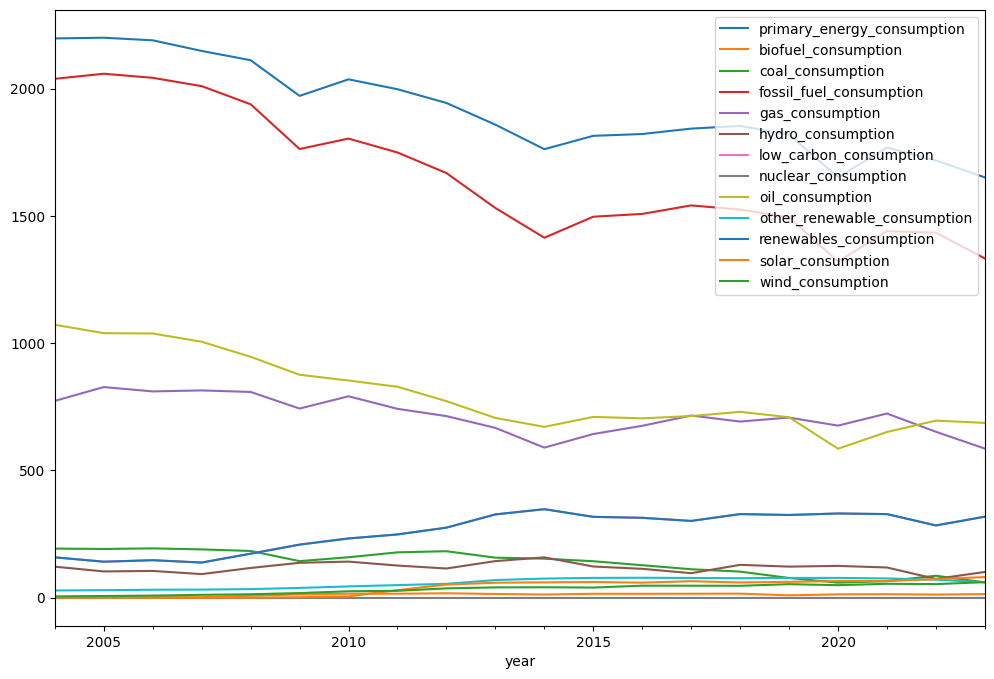

In [761]:
data_owid_consumption.plot(figsize=(12,8))

<Axes: xlabel='year'>

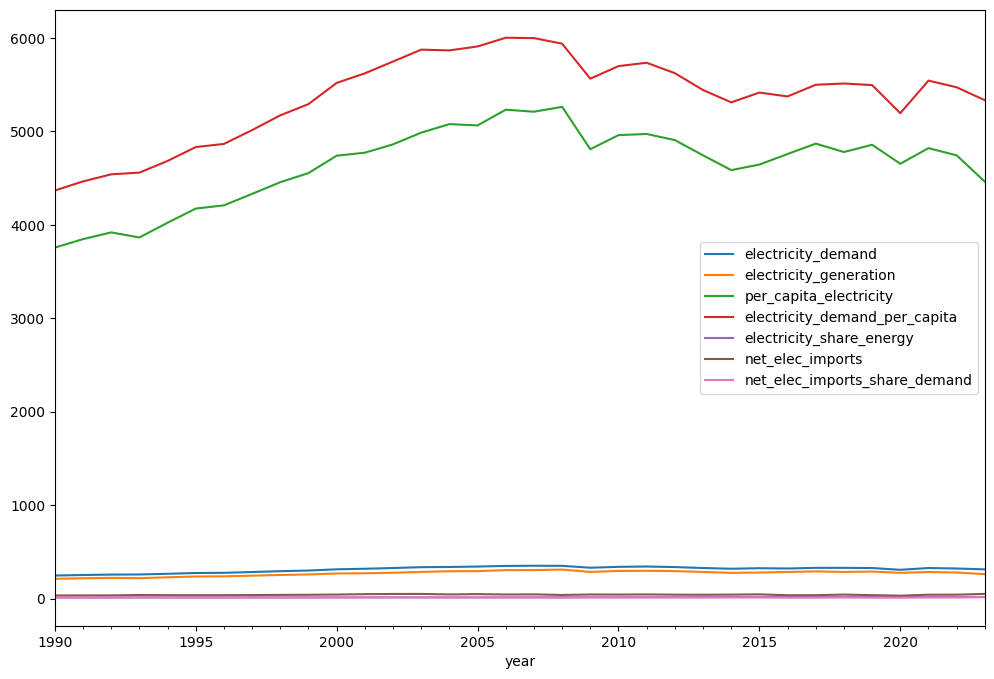

In [762]:
data_owid_electricity[['electricity_demand','electricity_generation','per_capita_electricity','electricity_demand_per_capita',
                           'electricity_share_energy','net_elec_imports','net_elec_imports_share_demand']].plot(figsize=(12,8))

<Axes: xlabel='year'>

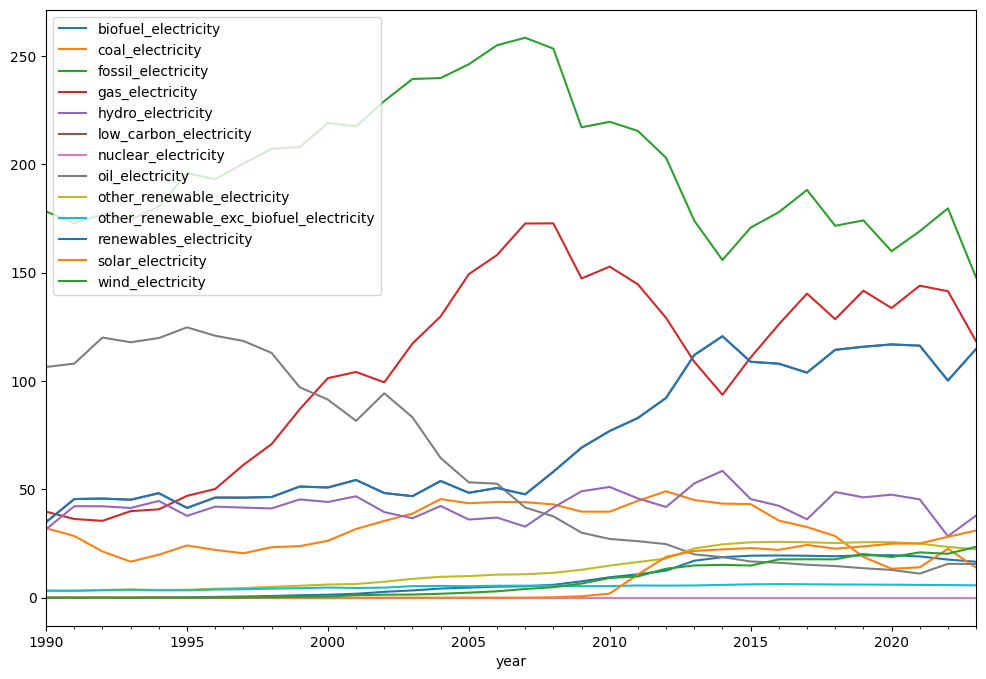

In [763]:
data_owid_electricity.drop(['electricity_demand','electricity_generation','per_capita_electricity','electricity_demand_per_capita',
                           'electricity_share_energy','net_elec_imports','net_elec_imports_share_demand'],axis=1).plot(figsize=(12,8))

<Axes: xlabel='year'>

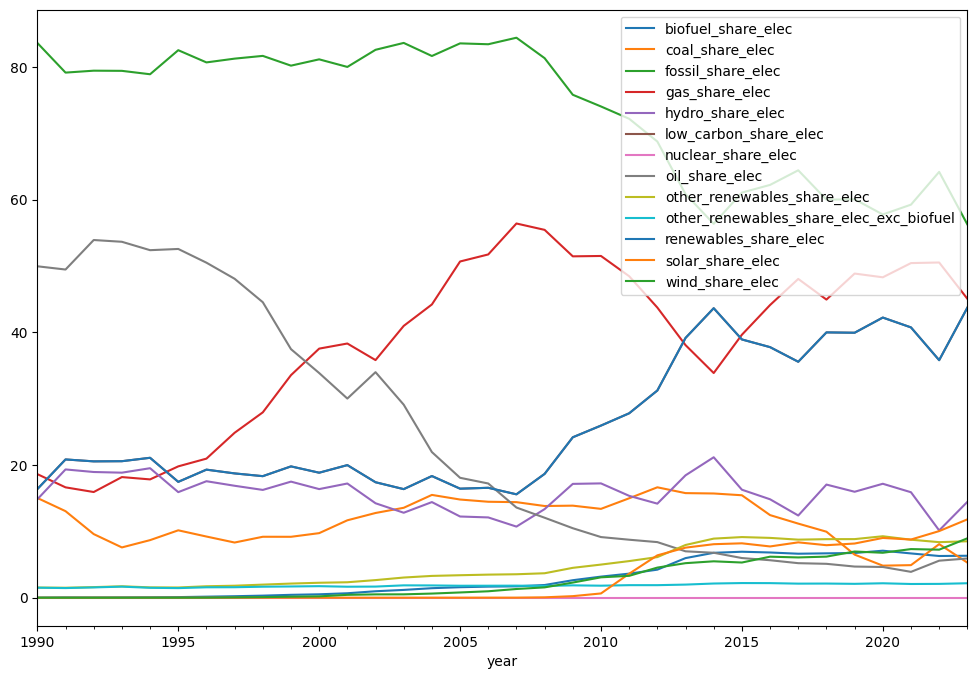

In [764]:
data_owid_share_elec.drop(['electricity_demand','electricity_generation'],axis=1).plot(figsize=(12,8))

<Axes: xlabel='year'>

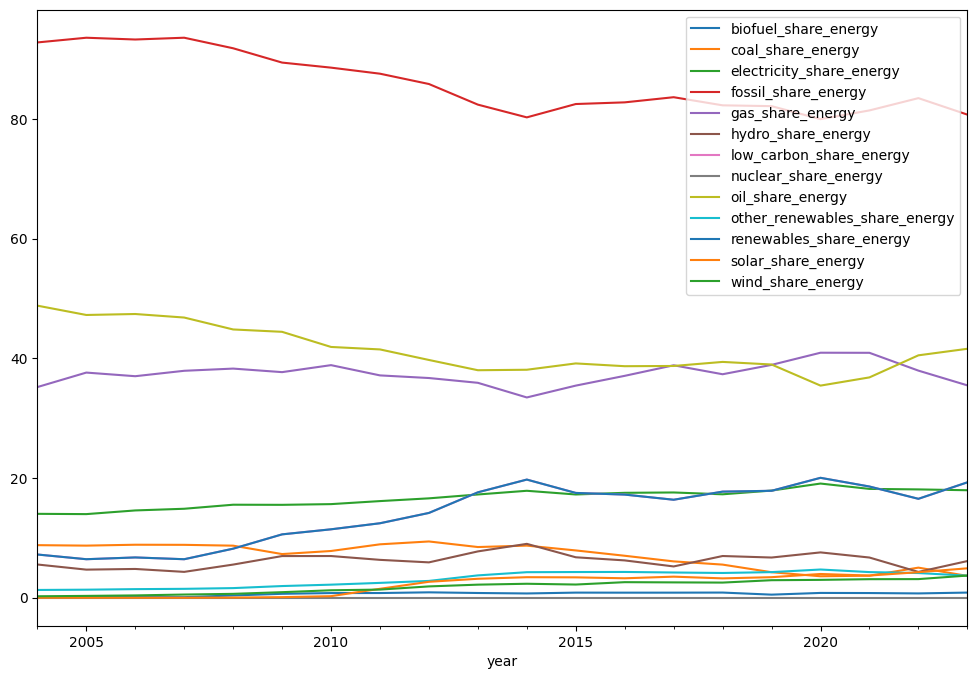

In [765]:
data_owid_share_energy.drop(['primary_energy_consumption'],axis=1).plot(figsize=(12,8))

In [766]:
data_owid = data_owid.loc[(data_owid['year'] > 1930) & (data_owid['year'] < 2015) & (data_owid['country'] == 'Italy')]

In [767]:
data_owid

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
9980,Italy,1931,ITA,40501139.0,1.866570e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.549,-0.479,69.411,2.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000,0.093,4.594,0.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9981,Italy,1932,ITA,40843255.0,1.906655e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.543,0.184,73.333,2.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.750,0.128,7.688,0.314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,Italy,1933,ITA,41185511.0,1.884730e+11,N

In [768]:
data = pd.read_csv("./dataset/energy.csv")

In [769]:
data

,year,tot_production,tot_consumption,agricultural,industry,transports,public_lighting,services,domestic_uses
0,1931,"10,470","8,335",103,"6,213",803,209,"1,007",0
1,1932,"10,590","8,420",103,"6,223",845,225,"1,024",0
2,1933,"11,650","9,293",114,"6,984",860,243,"1,092",0
3,1934,"12,600","10,159",110,"7,684",879,258,"1,228",0
4,1935,"13,800","11,168",138,"8,583","1,003",267,"1,177",0
...,...,...,...,...,...,...,...,...,...
79,2010,"302,062","309,885","5,610","138,439","10,666","6,366","79,253","69,551"
80,2011,"302,570","313,792","5,907","140,040","10,720","6,202","80,783","70,140"
81,2012,"299,275","307,220","5,923","130,801","10,759","6,261","84,019","69,457"
82,2013,"289,803","297,288","5,677","124,871","10,774","5,977","83,005","66,983"


In [770]:
data_owid = data_owid.reset_index(drop=True)

In [771]:
data = data.reset_index(drop=True)

In [772]:
data['population'] = data_owid['population']

In [773]:
data['gdp'] = data_owid['gdp']

In [774]:
data.tail()

,year,tot_production,tot_consumption,agricultural,industry,transports,public_lighting,services,domestic_uses,population,gdp
79,2010,"302,062","309,885","5,610","138,439","10,666","6,366","79,253","69,551",59822452.0,2.080546e+12
80,2011,"302,570","313,792","5,907","140,040","10,720","6,202","80,783","70,140",60025952.0,2.110883e+12
81,2012,"299,275","307,220","5,923","130,801","10,759","6,261","84,019","69,457",60190152.0,2.047960e+12
82,2013,"289,803","297,288","5,677","124,871","10,774","5,977","83,005","66,983",60312600.0,2.010255e+12
83,2014,"279,829","291,084","5,372","122,505","10,462","5,885","82,604","64,255",60322792.0,2.010164e+12


In [775]:
data['gdp_pp'] = data['gdp'] / data['population']

In [776]:
data['population'] = data['population'] / 1000

In [777]:
data['gdp'] = data['gdp'] / 10000000

In [778]:
for col in data.columns:
    if data[col].dtype == 'O':  
        data[col] = data[col].str.replace(',', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [779]:
data

,year,tot_production,tot_consumption,agricultural,industry,transports,public_lighting,services,domestic_uses,population,gdp,gdp_pp
0,1931,10470,8335,103,6213,803,209,1007,0,40501.139,18665.701376,4608.685542
1,1932,10590,8420,103,6223,845,225,1024,0,40843.255,19066.545766,4668.223864
2,1933,11650,9293,114,6984,860,243,1092,0,41185.511,18847.304909,4576.197903
3,1934,12600,10159,110,7684,879,258,1228,0,41530.635,18798.734541,4526.474142
4,1935,13800,11168,138,8583,1003,267,1177,0,41878.651,19814.342656,4731.370802
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2010,302062,309885,5610,138439,10666,6366,79253,69551,59822.452,208054.596403,34778.680821
80,2011,302570,313792,5907,140040,10720,6202,80783,70140,60025.952,211088.336486,35166.178870
81,2012,299275,307220,5923,130801,10759,6261,84019,69457,60190.152,204795.989197,34024.833364
82,2013,289803,297288,5677,124871,10774,5977,83005,66983,60312.600,201025.532723,33330.603012


In [780]:
data['year'] = pd.to_datetime(data['year'],format='%Y')

In [781]:
data.set_index('year',inplace=True)

In [782]:
data

,tot_production,tot_consumption,agricultural,industry,transports,public_lighting,services,domestic_uses,population,gdp,gdp_pp
year,,,,,,,,,,,
1931-01-01,10470,8335,103,6213,803,209,1007,0,40501.139,18665.701376,4608.685542
1932-01-01,10590,8420,103,6223,845,225,1024,0,40843.255,19066.545766,4668.223864
1933-01-01,11650,9293,114,6984,860,243,1092,0,41185.511,18847.304909,4576.197903
1934-01-01,12600,10159,110,7684,879,258,1228,0,41530.635,18798.734541,4526.474142
1935-01-01,13800,11168,138,8583,1003,267,1177,0,41878.651,19814.342656,4731.370802
...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01,302062,309885,5610,138439,10666,6366,79253,69551,59822.452,208054.596403,34778.680821
2011-01-01,302570,313792,5907,140040,10720,6202,80783,70140,60025.952,211088.336486,35166.178870
2012-01-01,299275,307220,5923,130801,10759,6261,84019,69457,60190.152,204795.989197,34024.833364


In [783]:
data.to_csv('./dataset/energy_dataset.csv',index=False)

<Axes: xlabel='year'>

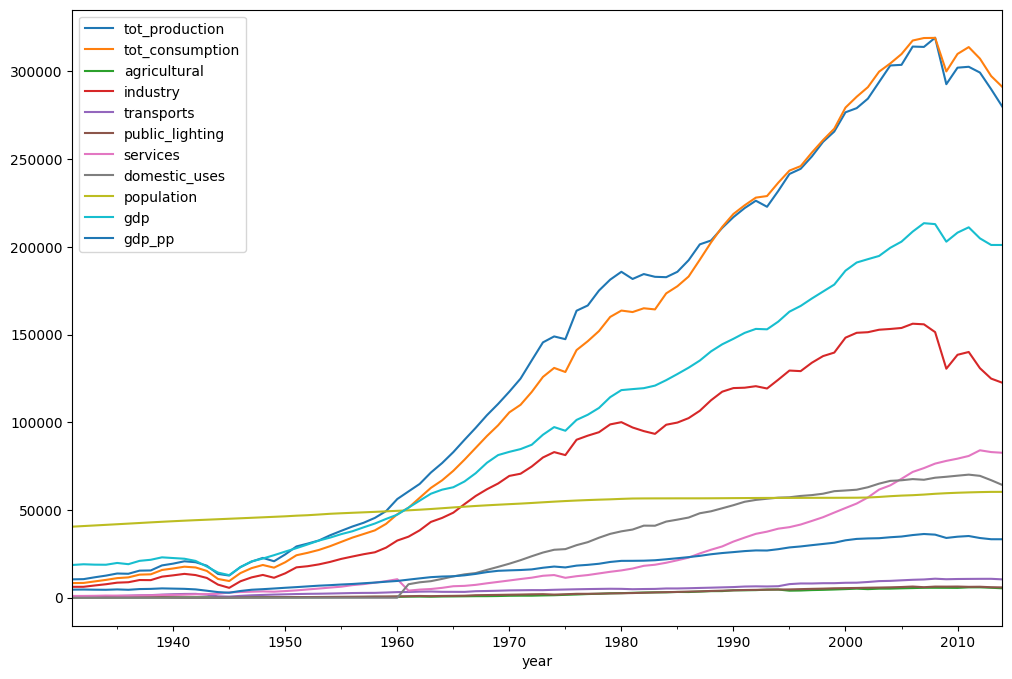

In [784]:
data.plot(figsize=(12,8))

<Axes: xlabel='year'>

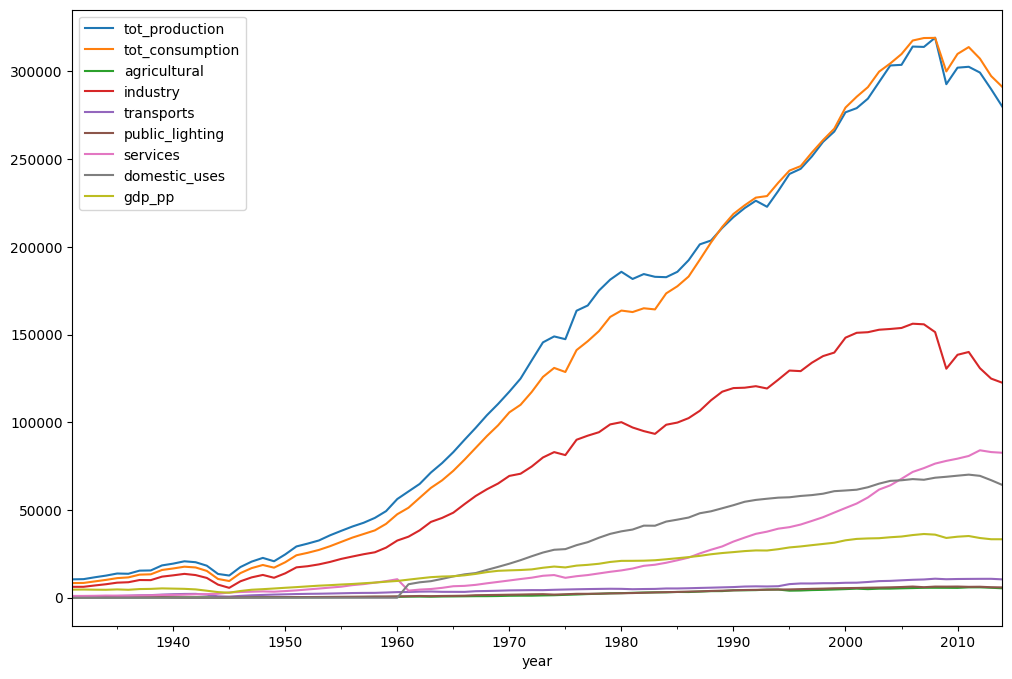

In [785]:
data.drop(['gdp','population'],axis=1).plot(figsize=(12,8))

<Axes: xlabel='year'>

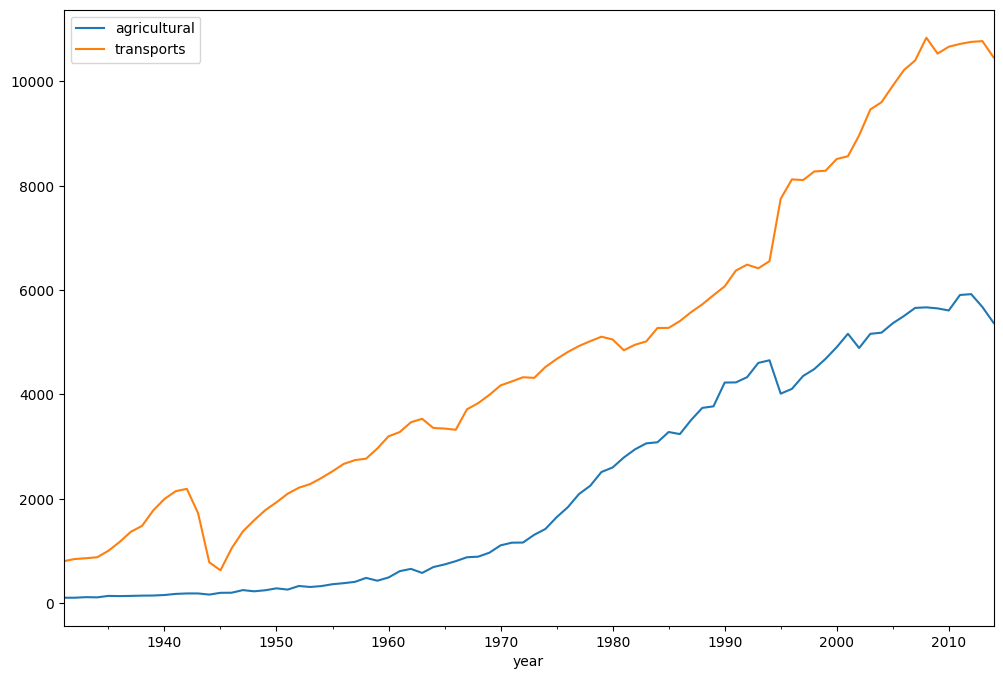

In [786]:
data[['agricultural','transports']].plot(figsize=(12,8))

In [787]:
prod_cycle,prod_trend = hpfilter(data['tot_production'])

<Axes: xlabel='year'>

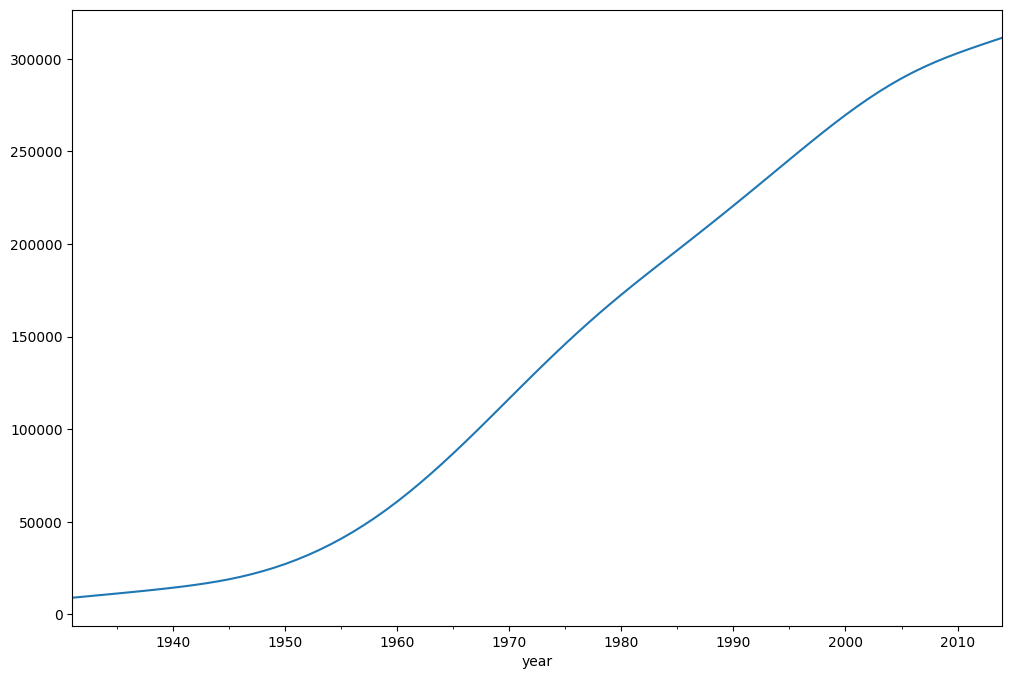

In [788]:
prod_trend.plot(figsize=(12,8))

In [789]:
data['production_trend'] = prod_trend

<Axes: xlabel='year'>

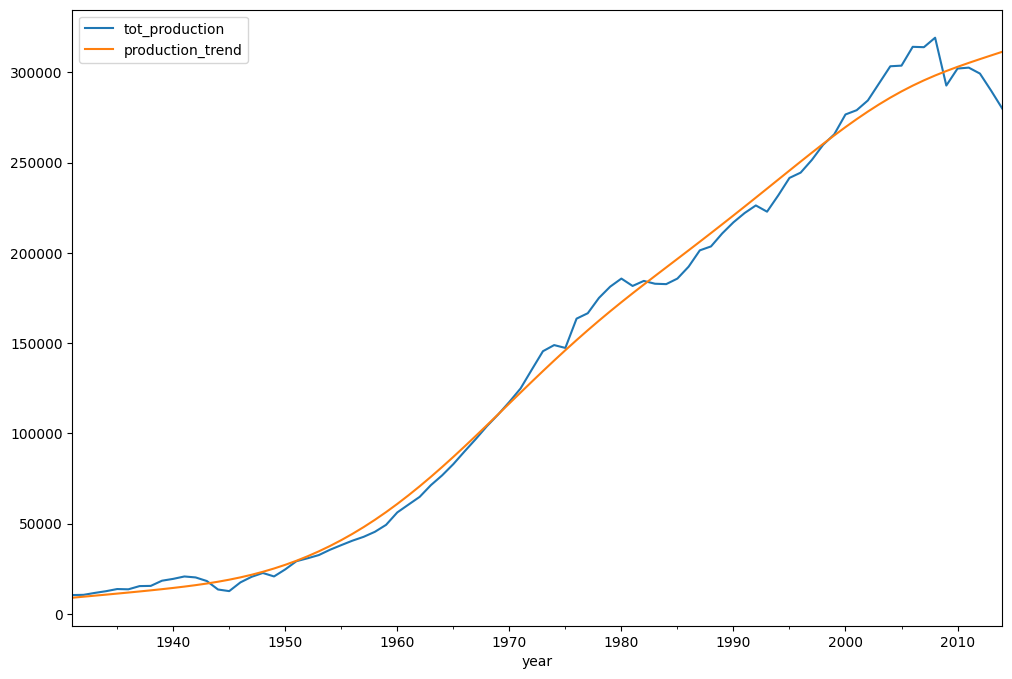

In [790]:
data[['tot_production','production_trend']].plot(figsize=(12,8))

In [791]:
cons_cycle,cons_trend = hpfilter(data['tot_consumption'])

In [792]:
data['consumption_trend'] = cons_trend

<Axes: xlabel='year'>

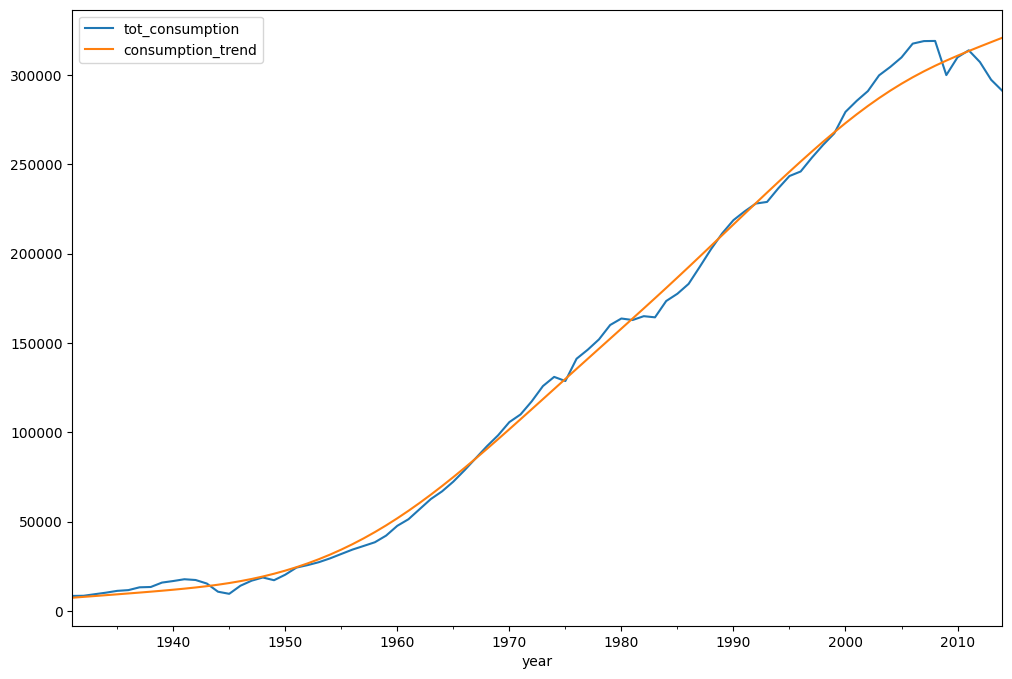

In [793]:
data[['tot_consumption','consumption_trend']].plot(figsize=(12,8))

<Axes: xlabel='year'>

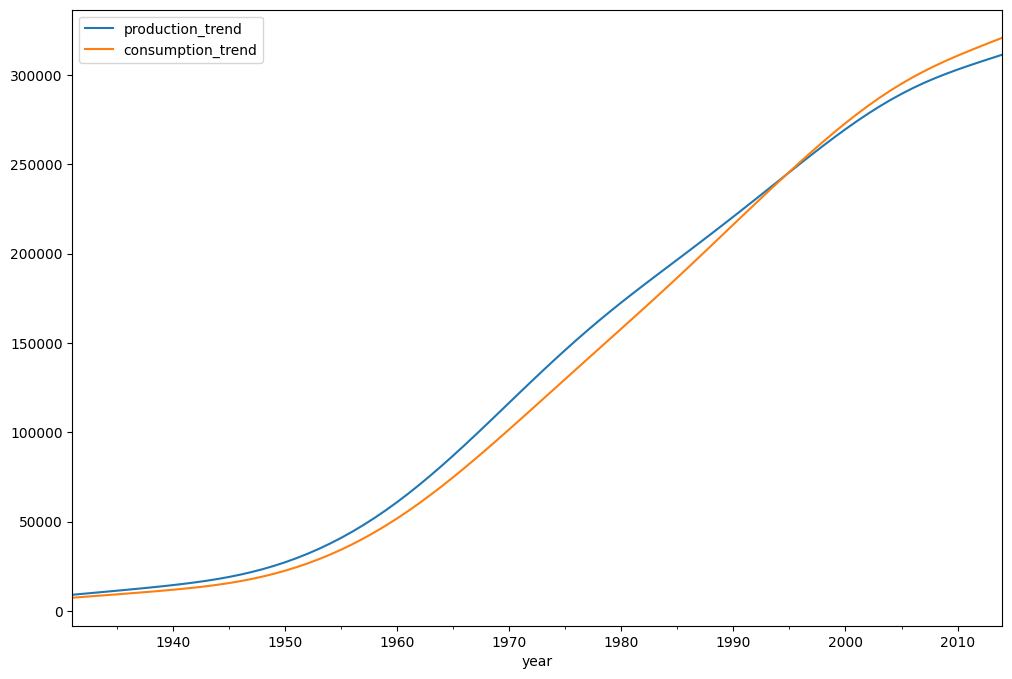

In [794]:
data[['production_trend','consumption_trend']].plot(figsize=(12,8))

<Axes: xlabel='year'>

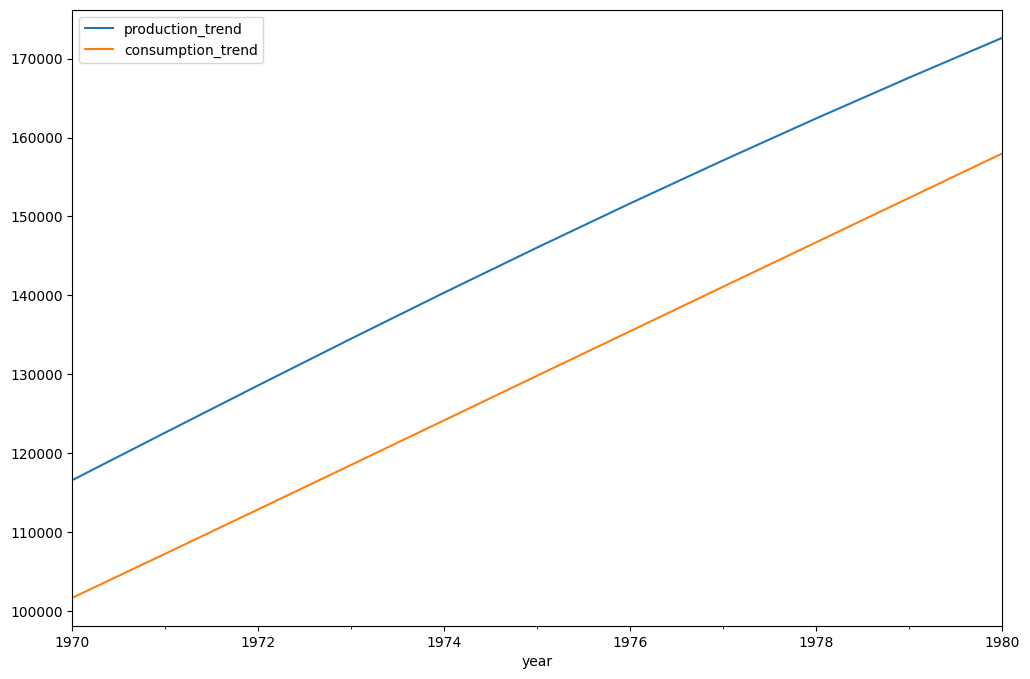

In [795]:
data[['production_trend','consumption_trend']].loc['1970-01-01':'1980-01-01'].plot(figsize=(12,8))

In [796]:
result = seasonal_decompose(data['tot_production'])

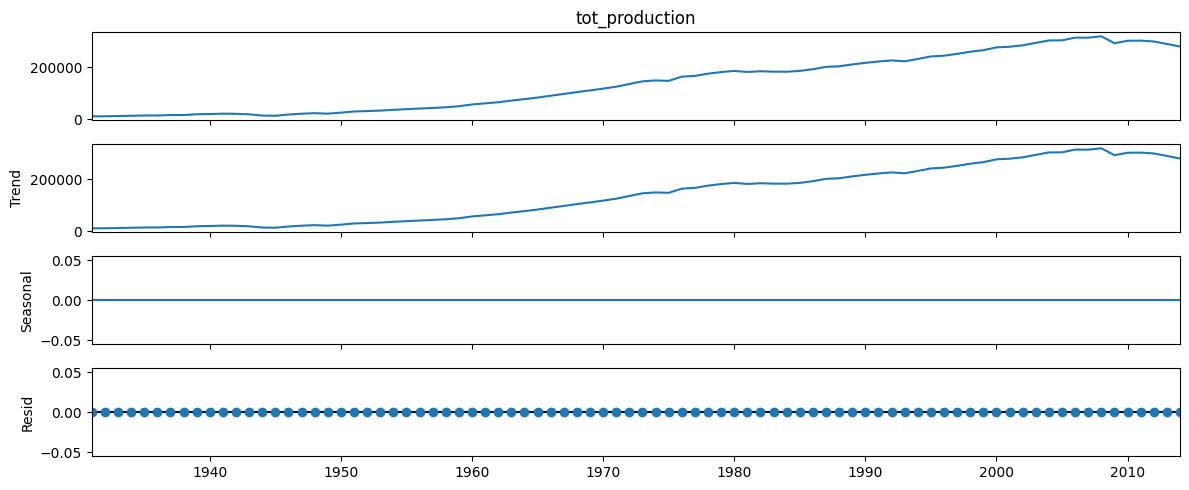

In [797]:
rcParams['figure.figsize'] = 12,5
result.plot();

In [798]:
result = seasonal_decompose(data['tot_consumption'])

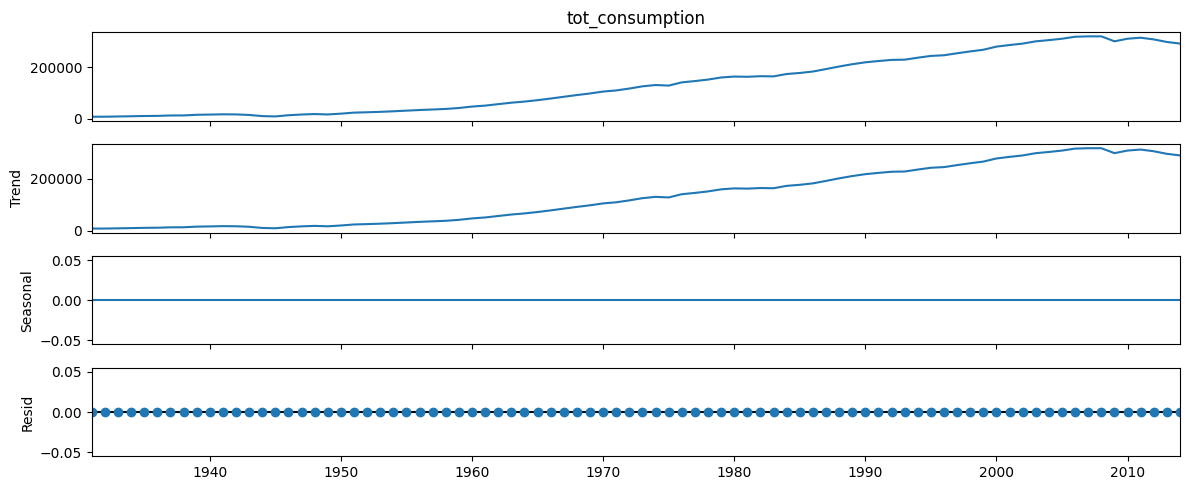

In [799]:
rcParams['figure.figsize'] = 12,5
result.plot();

In [800]:
data['5-year-MA'] = data['tot_production'].rolling(window=5).mean()

In [801]:
data['10-year-MA'] = data['tot_production'].rolling(window=10).mean()

<Axes: xlabel='year'>

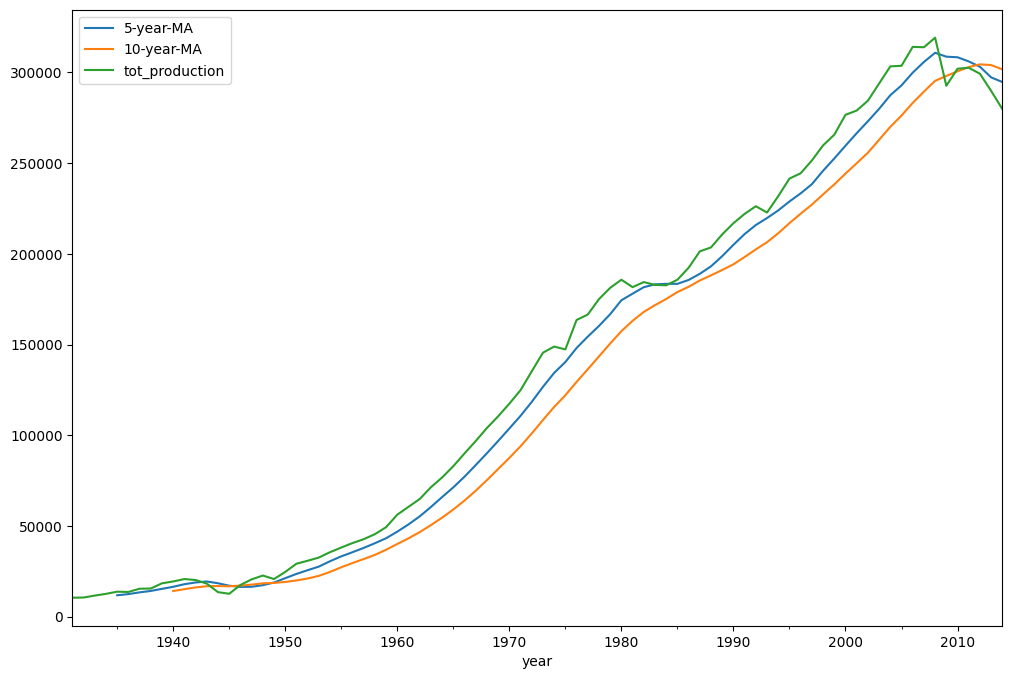

In [802]:
data[['5-year-MA','10-year-MA','tot_production']].plot(figsize=(12,8))

In [803]:
data.columns

Index(['tot_production', 'tot_consumption', 'agricultural', 'industry',
       'transports', 'public_lighting', 'services', 'domestic_uses',
       'population', 'gdp', 'gdp_pp', 'production_trend', 'consumption_trend',
       '5-year-MA', '10-year-MA'],
      dtype='object')

In [804]:
data.drop(['production_trend', 'consumption_trend','5-year-MA', '10-year-MA'],
          axis=1,inplace=True)

In [805]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [806]:
adf_test(data['tot_production'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.351129
p-value                  0.605469
# lags used              4.000000
# observations          79.000000
critical value (1%)     -3.515977
critical value (5%)     -2.898886
critical value (10%)    -2.586694
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [807]:
adf_test(data['tot_consumption'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.627755
p-value                  0.468666
# lags used              5.000000
# observations          78.000000
critical value (1%)     -3.517114
critical value (5%)     -2.899375
critical value (10%)    -2.586955
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# var model

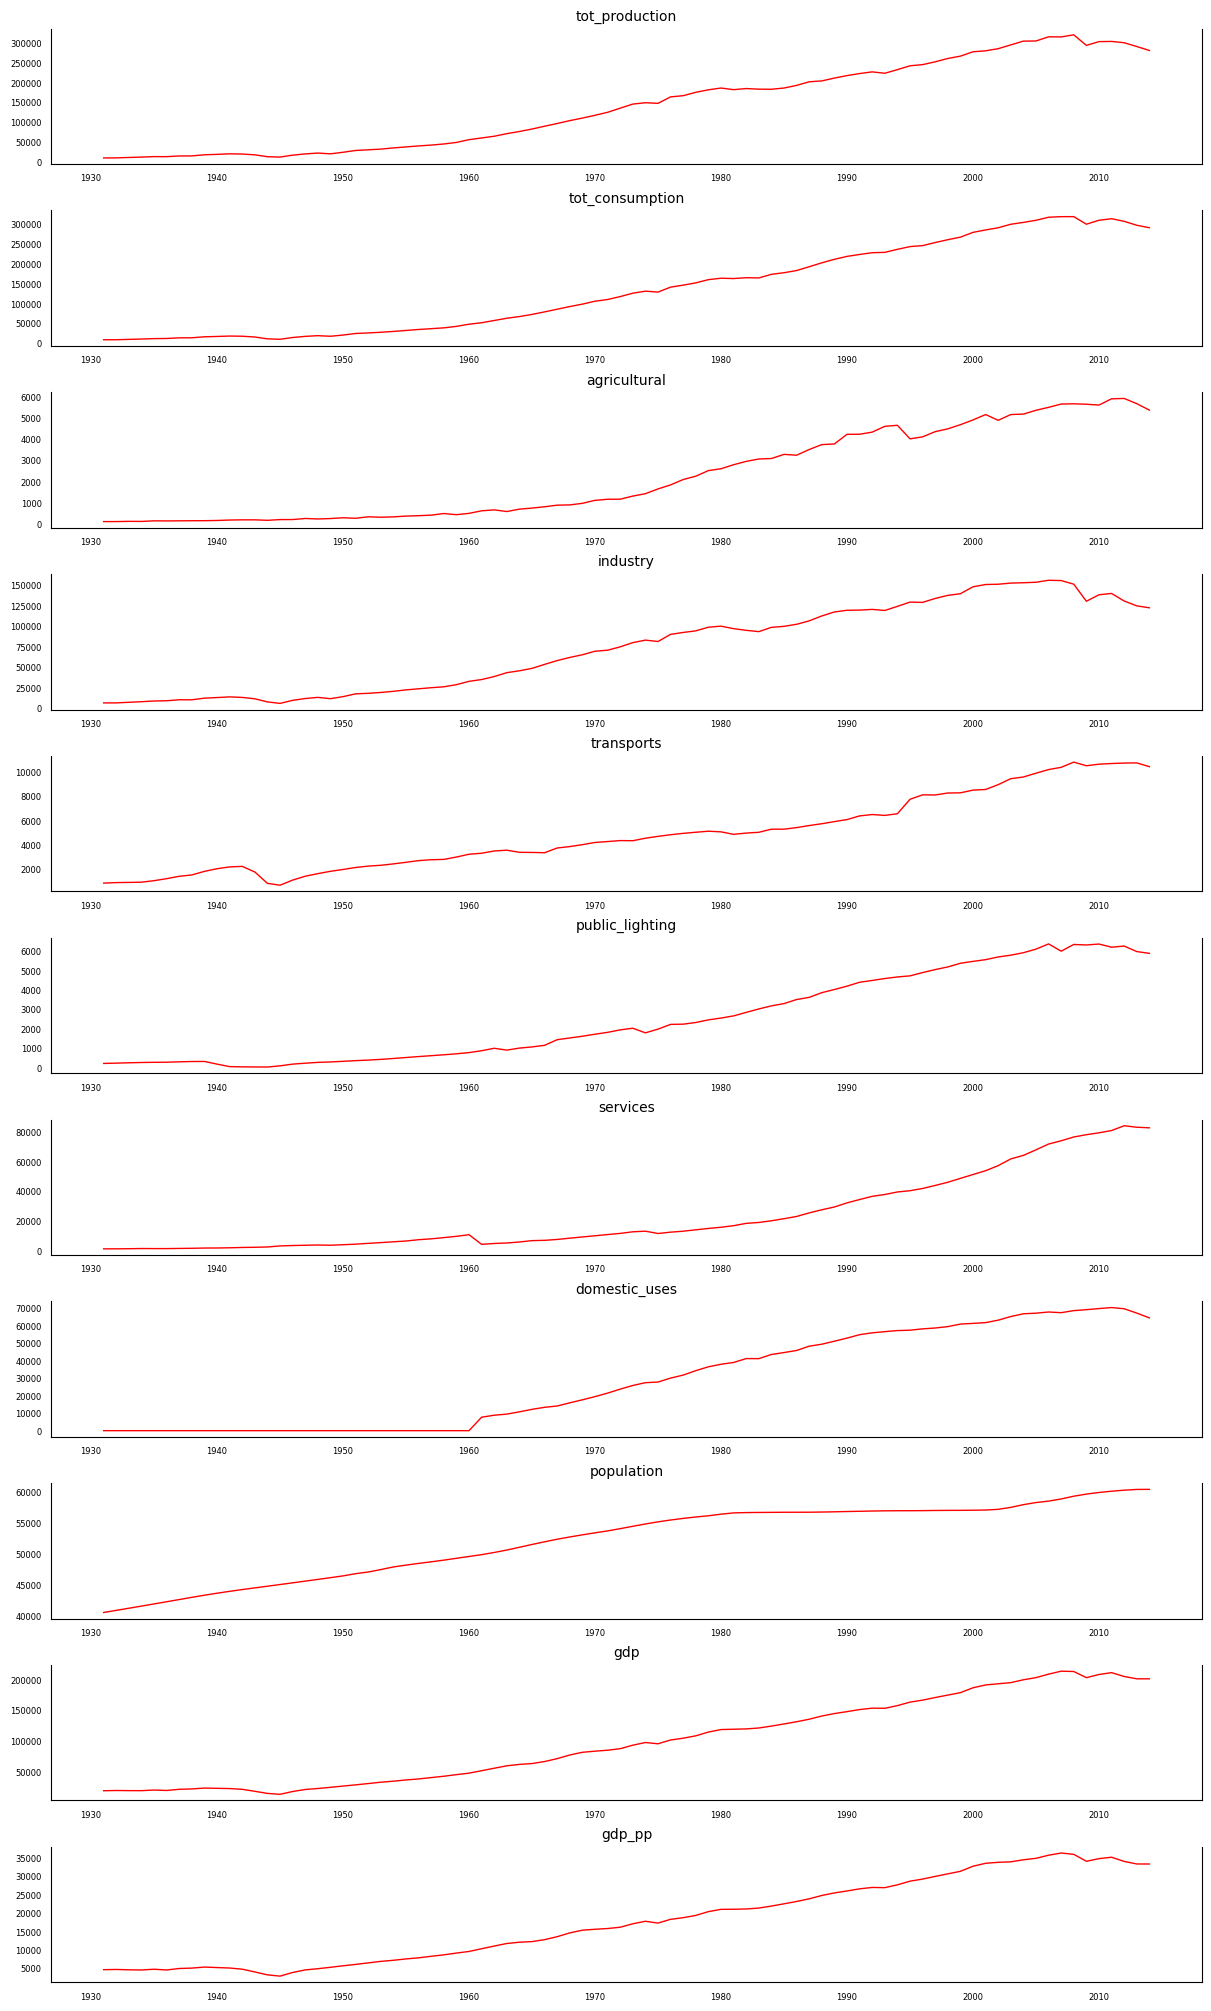

In [808]:
fig, axes = plt.subplots(nrows=11,figsize=(12, 20),constrained_layout=True)

for i, ax in enumerate(axes):
    data_ = data[data.columns[i]]
    
    ax.plot(data_, color='red', linewidth=1)
    ax.set_title(data.columns[i], fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

## normalize

In [809]:
avgs = data.mean()

In [810]:
devs = data.std()

In [811]:
for col in data.columns:
    data[col] = (data[col] - avgs.loc[col]) / devs.loc[col]

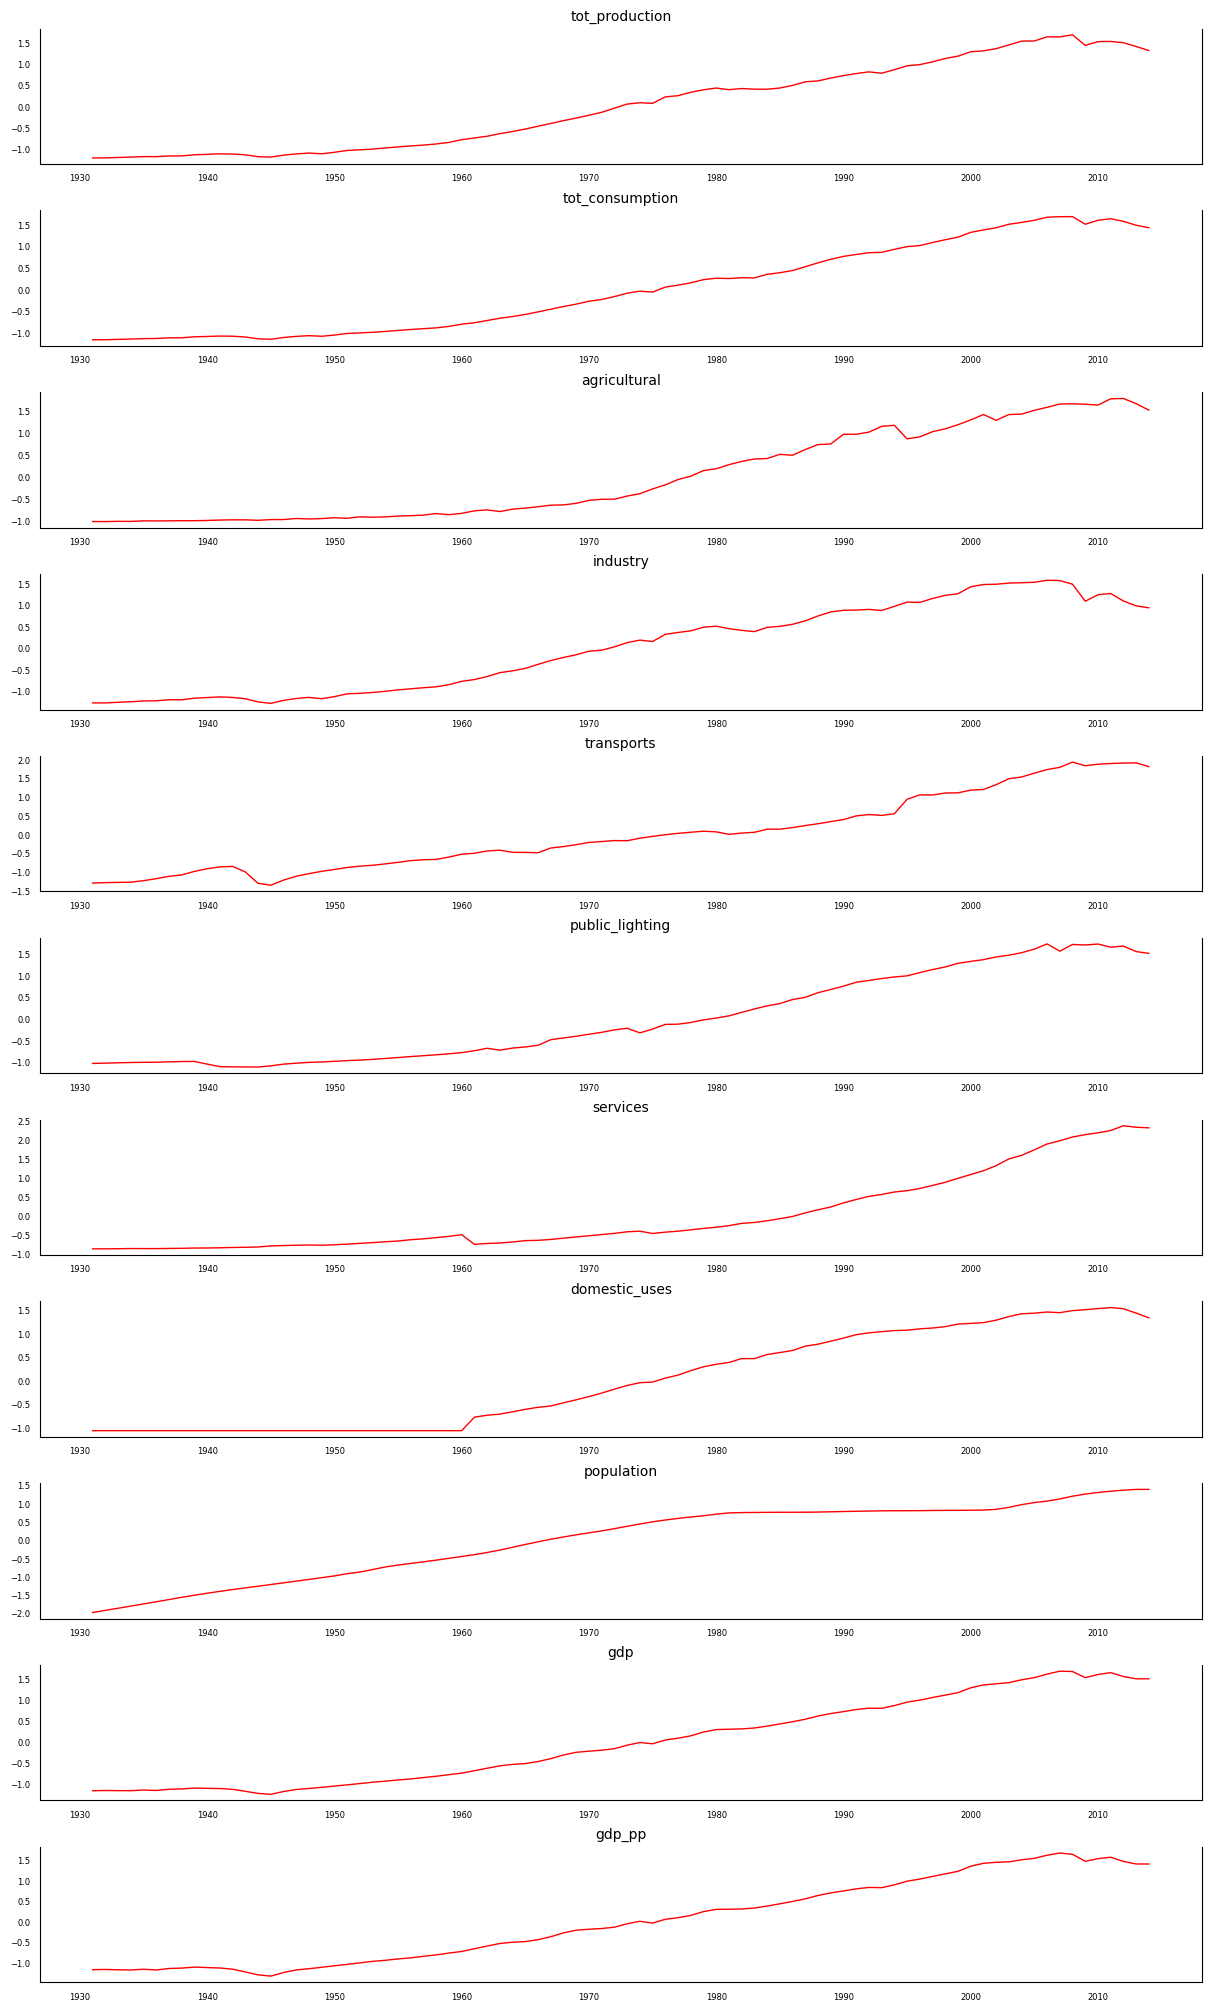

In [812]:
fig, axes = plt.subplots(nrows=11,figsize=(12, 20),constrained_layout=True)

for i, ax in enumerate(axes):
    data_ = data[data.columns[i]]
    
    ax.plot(data_, color='red', linewidth=1)
    ax.set_title(data.columns[i], fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

## remove trend

In [813]:
data = data.diff().dropna()

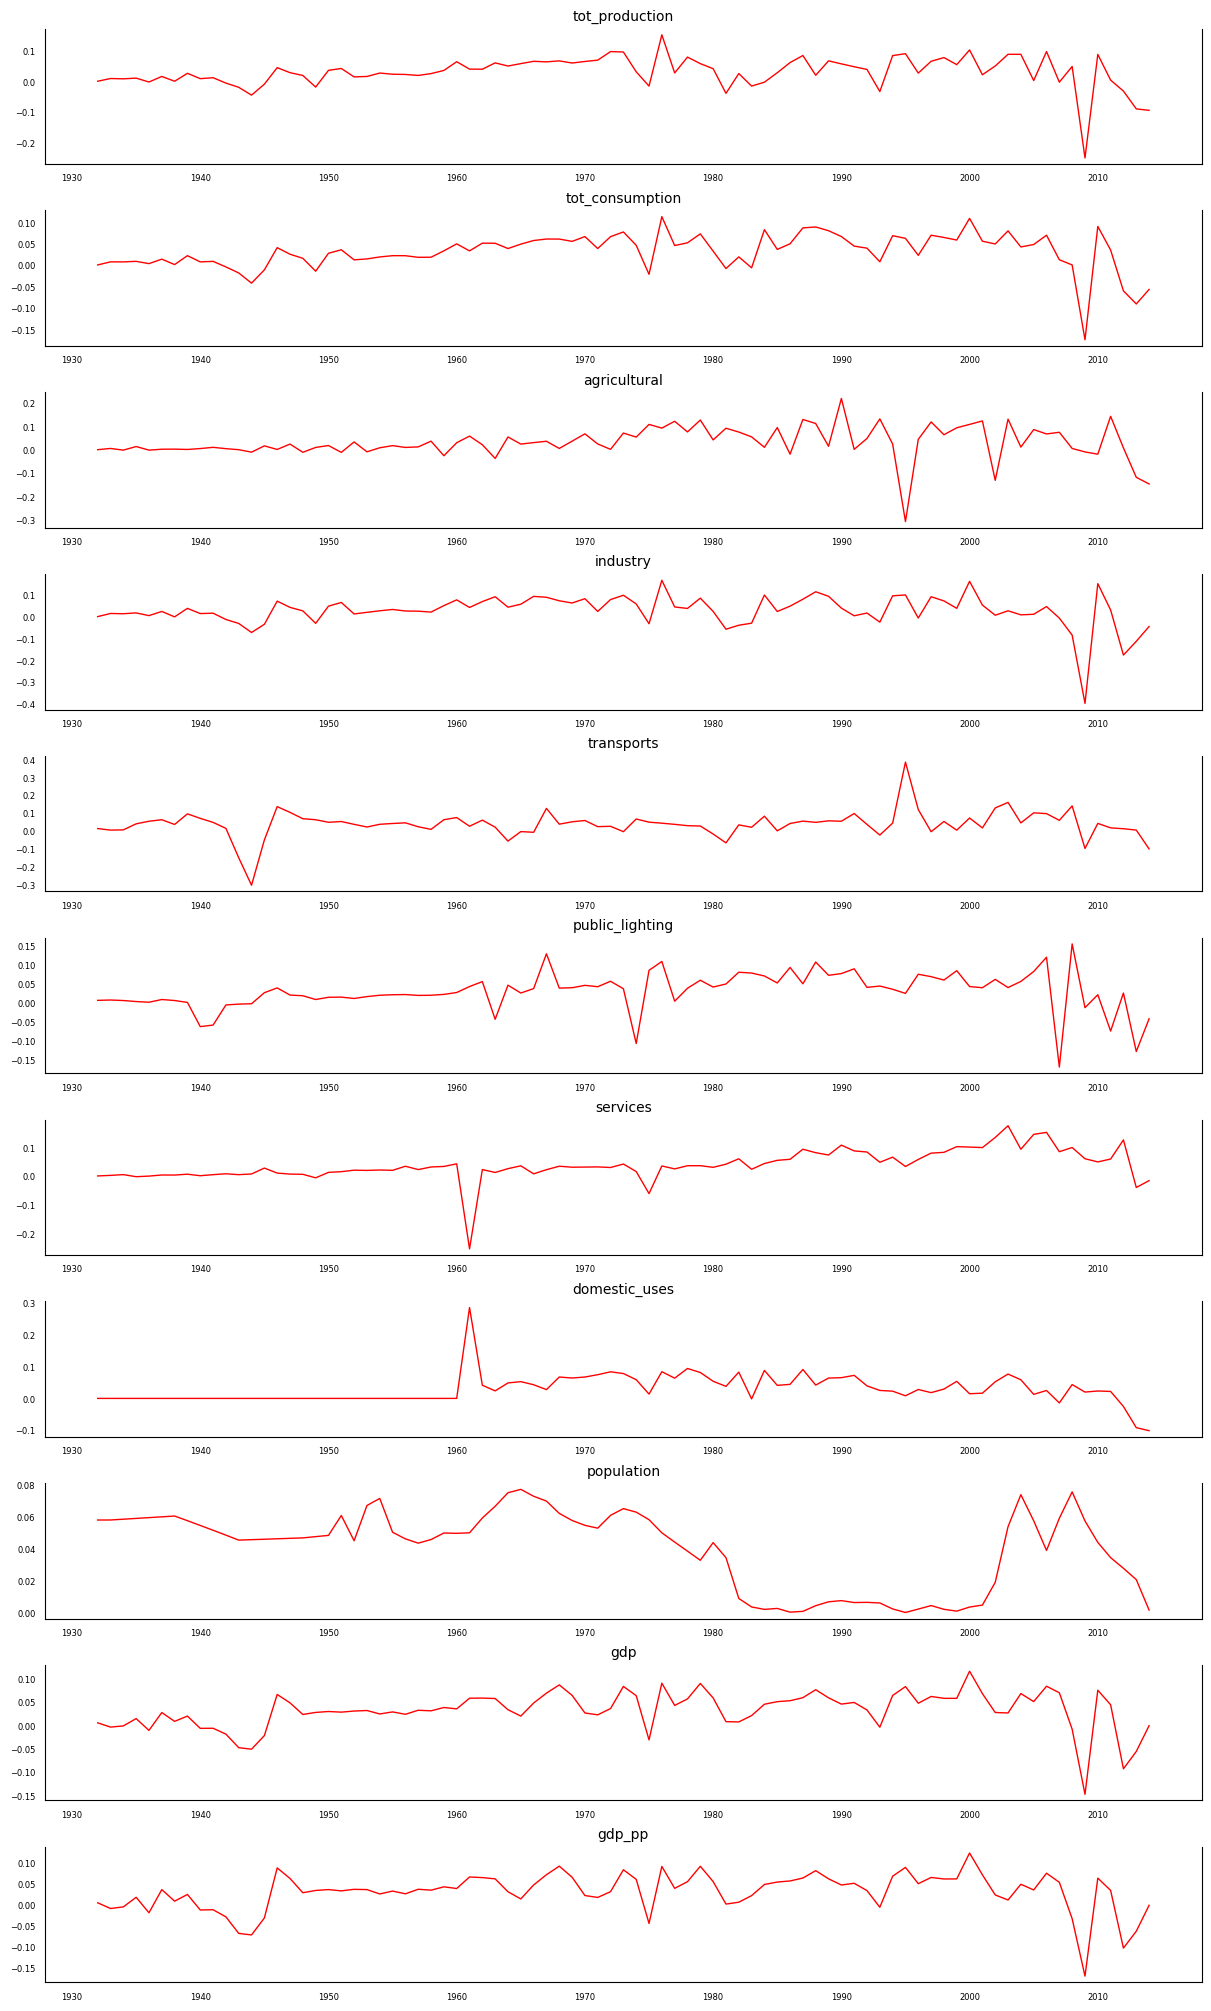

In [814]:
fig, axes = plt.subplots(nrows=11,figsize=(12, 20),constrained_layout=True)

for i, ax in enumerate(axes):
    data_ = data[data.columns[i]]
    
    ax.plot(data_, color='red', linewidth=1)
    ax.set_title(data.columns[i], fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

In [815]:
adf_test(data['tot_production'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.557941
p-value                  0.504679
# lags used              3.000000
# observations          79.000000
critical value (1%)     -3.515977
critical value (5%)     -2.898886
critical value (10%)    -2.586694
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [816]:
adf_test(data['tot_consumption'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.533679
p-value                  0.516790
# lags used              3.000000
# observations          79.000000
critical value (1%)     -3.515977
critical value (5%)     -2.898886
critical value (10%)    -2.586694
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [817]:
data = data.diff().dropna()

In [818]:
adf_test(data['tot_production'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.694456e+00
p-value                 1.113944e-16
# lags used             2.000000e+00
# observations          7.900000e+01
critical value (1%)    -3.515977e+00
critical value (5%)    -2.898886e+00
critical value (10%)   -2.586694e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [819]:
adf_test(data['tot_consumption'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.929602e+00
p-value                 1.092710e-09
# lags used             3.000000e+00
# observations          7.800000e+01
critical value (1%)    -3.517114e+00
critical value (5%)    -2.899375e+00
critical value (10%)   -2.586955e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


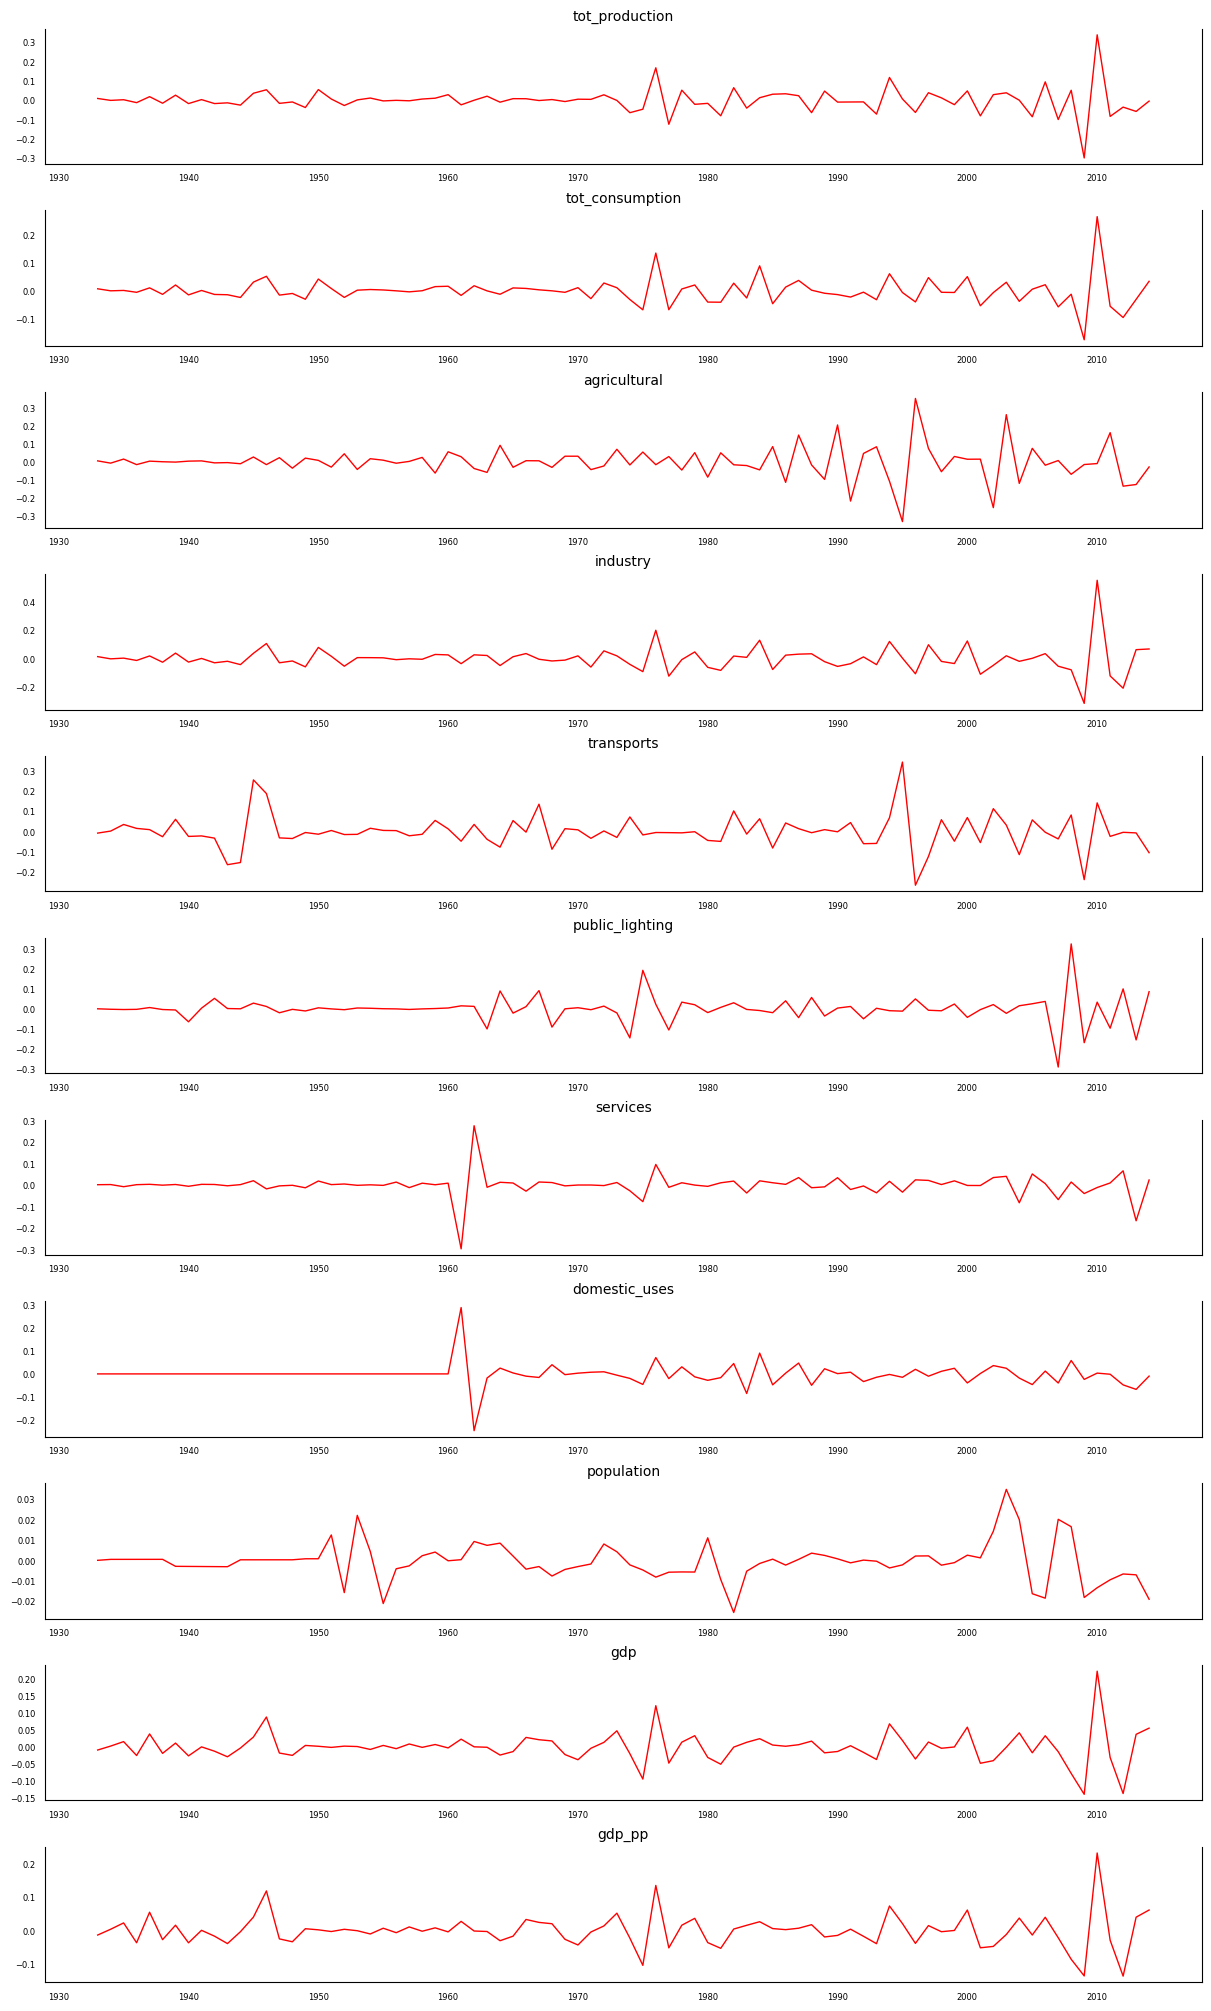

In [820]:
fig, axes = plt.subplots(nrows=11,figsize=(12, 20),constrained_layout=True)

for i, ax in enumerate(axes):
    data_ = data[data.columns[i]]
    
    ax.plot(data_, color='red', linewidth=1)
    ax.set_title(data.columns[i], fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

## pacf

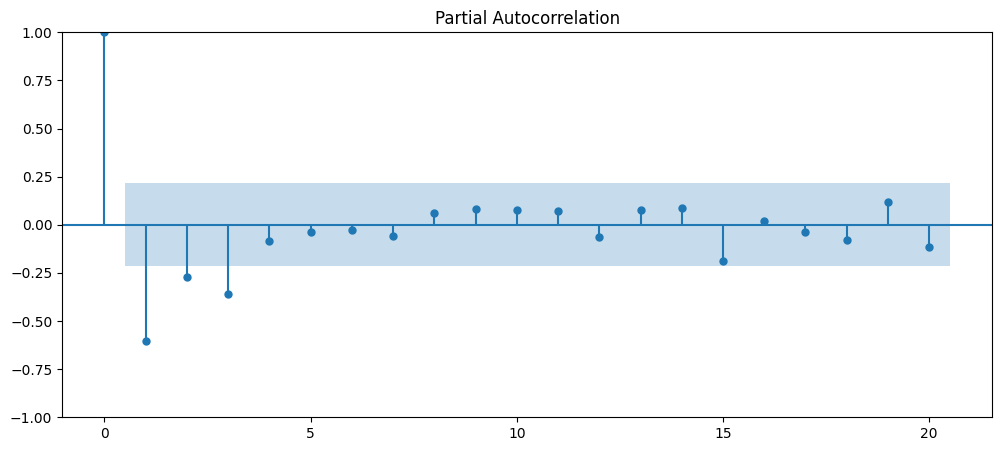

In [821]:
plot_pacf(data['tot_production'])
plt.show()

In [822]:
for lag in range(1, 14):
    energy_series = data['tot_production'].iloc[lag:]
    lagged_energy_series = data['gdp_pp'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(energy_series,lagged_energy_series))
    print('------')

Lag: 1
PearsonRResult(statistic=-0.34360529266489126, pvalue=0.0016860656449920362)
------
Lag: 2
PearsonRResult(statistic=-0.022153646566570553, pvalue=0.845350994758093)
------
Lag: 3
PearsonRResult(statistic=-0.06182810142982377, pvalue=0.5883013356147045)
------
Lag: 4
PearsonRResult(statistic=0.13843693098293688, pvalue=0.22676571849374724)
------
Lag: 5
PearsonRResult(statistic=-0.13528563517665007, pvalue=0.2407509644101037)
------
Lag: 6
PearsonRResult(statistic=0.19841269821677396, pvalue=0.08576340035872007)
------
Lag: 7
PearsonRResult(statistic=-0.1237107825092828, pvalue=0.2903105415149979)
------
Lag: 8
PearsonRResult(statistic=0.029669003473609897, pvalue=0.8018662547039361)
------
Lag: 9
PearsonRResult(statistic=-0.1080843601881144, pvalue=0.36271466683219)
------
Lag: 10
PearsonRResult(statistic=0.12638633713097652, pvalue=0.29009927642147515)
------
Lag: 11
PearsonRResult(statistic=0.040789080523731994, pvalue=0.7355629553023549)
------
Lag: 12
PearsonRResult(statisti

In [823]:
model = VAR(data)

In [824]:
results = model.fit(maxlags=1)

In [825]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Apr, 2025
Time:                     13:07:04
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -89.6791
Nobs:                     81.0000    HQIC:                  -92.0156
Log likelihood:           2657.76    FPE:                2.33733e-41
AIC:                     -93.5811    Det(Omega_mle):     5.11380e-42
--------------------------------------------------------------------
Results for equation tot_production
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.002113         0.005839           -0.362           0.717
L1.tot_production         -0.847491         0.220045           -3.851           0.000
L1.tot_consumption     -1880.29

In [826]:
lagged_values = data.values[-1:]

In [827]:
z = results.forecast(y=lagged_values,steps=5)

In [828]:
z

array([[ 0.03958539,  0.04394198,  0.00213402,  0.0786239 ,  0.04528945,
        -0.12652022,  0.04688497, -0.01414739, -0.00848061,  0.03049909,
         0.03275625],
       [-0.00554965, -0.02663544,  0.01728466, -0.04173993,  0.00847033,
         0.05193388, -0.04114572,  0.00562474,  0.00267856, -0.0168008 ,
        -0.01974516],
       [-0.01340453,  0.00292209, -0.02297626,  0.00040163, -0.01555779,
        -0.00617147,  0.01547507,  0.0004303 , -0.00161536,  0.00213512,
         0.00436792],
       [ 0.00948655,  0.00427585,  0.01027441,  0.01181206,  0.00628142,
        -0.01290051,  0.00143479, -0.00747761, -0.0012619 ,  0.00329657,
         0.00253598],
       [-0.00227939, -0.00288794, -0.00653394, -0.00515321,  0.00084999,
         0.00681341, -0.00648589,  0.00433397, -0.00019222, -0.00072366,
        -0.00053862]])

In [829]:
idx = pd.date_range('2015-01-01',periods=5,freq='YS')

In [830]:
idx

DatetimeIndex(['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [831]:
df_forecast = pd.DataFrame(data=z,index=idx,columns=data.columns)

In [832]:
df_forecast

,tot_production,tot_consumption,agricultural,industry,transports,public_lighting,services,domestic_uses,population,gdp,gdp_pp
2015-01-01,0.039585,0.043942,0.002134,0.078624,0.045289,-0.126520,0.046885,-0.014147,-0.008481,0.030499,0.032756
2016-01-01,-0.005550,-0.026635,0.017285,-0.041740,0.008470,0.051934,-0.041146,0.005625,0.002679,-0.016801,-0.019745
2017-01-01,-0.013405,0.002922,-0.022976,0.000402,-0.015558,-0.006171,0.015475,0.000430,-0.001615,0.002135,0.004368
2018-01-01,0.009487,0.004276,0.010274,0.011812,0.006281,-0.012901,0.001435,-0.007478,-0.001262,0.003297,0.002536
2019-01-01,-0.002279,-0.002888,-0.006534,-0.005153,0.000850,0.006813,-0.006486,0.004334,-0.000192,-0.000724,-0.000539


<Axes: >

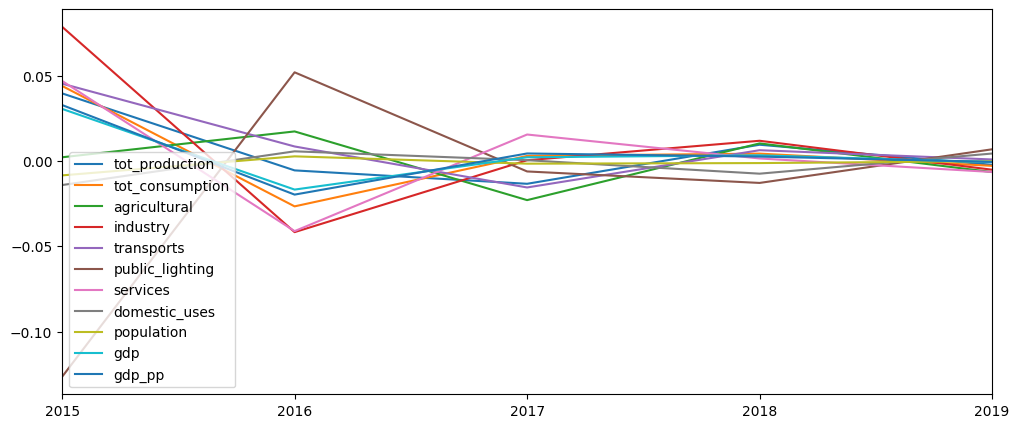

In [836]:
df_forecast.plot()

<Axes: >

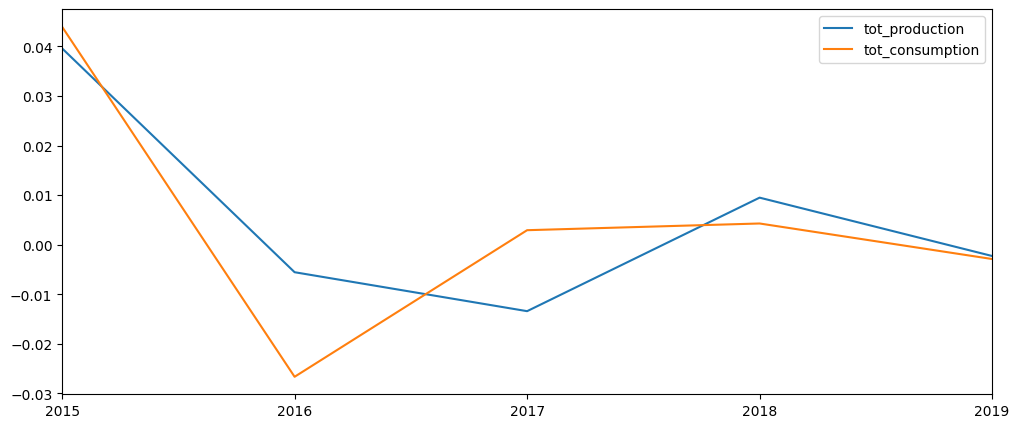

In [837]:
df_forecast[['tot_production','tot_consumption']].plot()

<Axes: xlabel='year'>

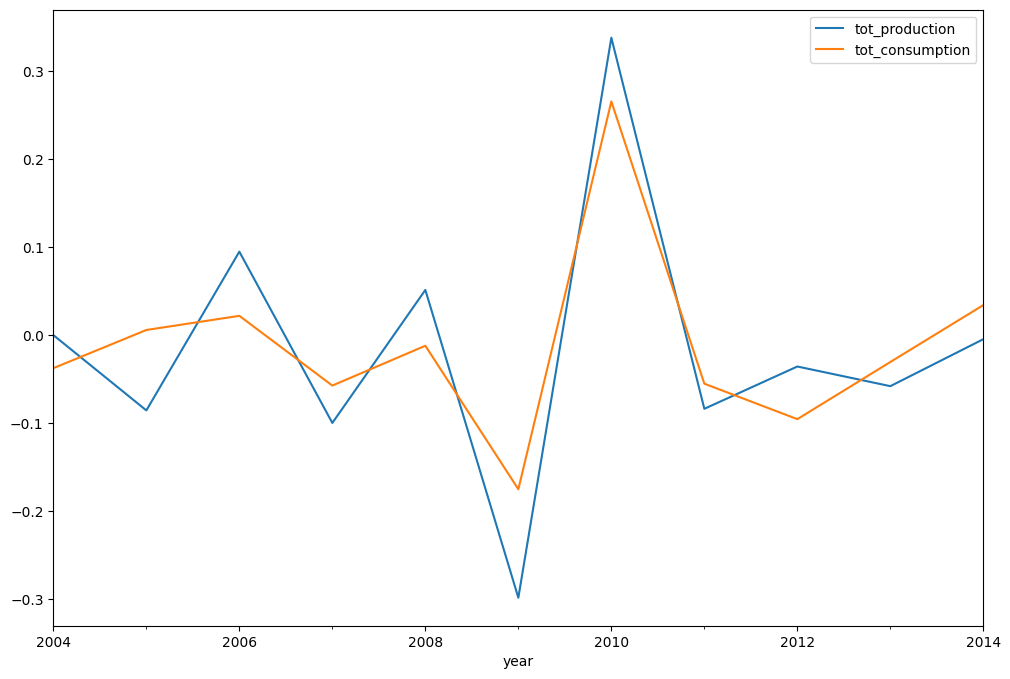

In [835]:
data[['tot_production','tot_consumption']].loc['2004-01-01':].plot(figsize=(12,8))